In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

#### Loading MNIST data set from openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
X, y = mnist['data'], mnist['target']

y = y.astype(np.uint8)
X = X.astype(np.uint8)

In [4]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


#### Take a deep look of the data set

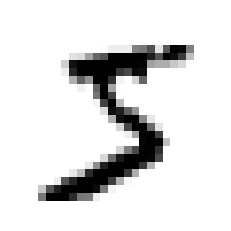

5

In [5]:
random_digit = X[0]
random_digit_image = random_digit.reshape(28, 28)
plt.imshow(random_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()
y[0]

#### Train Test data load

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train.astype(np.int8)

array([5, 0, 4, ..., 5, 6, 8], dtype=int8)

In [7]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training A Binary Classifier for recognizing 5

In [8]:
X_train_5 = (X_train == 5)
X_test_5 = (X_test == 5)
y_train_5 = (y_train == 5) # True if y_train value is 5, else will return flase
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_5, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict(X_test_5)

array([False, False, False, ..., False, False, False])

In [11]:
sgd_clf.score(X_test_5, y_test_5)

0.9109

### Implementing Cross-Validation

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=None)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_fold = X_train[train_index]
    y_train_fold = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    
    clone_clf.fit(X_train_fold, y_train_fold)
    y_predict = clone_clf.predict(X_test_fold)
    n_correct = sum(y_predict == y_test_fold)
    print(n_correct / len(y_predict))

0.88905
0.86125
0.8329


### Cross-Validation using Sklearn

In [34]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96115, 0.9511 , 0.9631 ])

In [36]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

y_train_predict

array([False, False,  True, ..., False, False, False])

### Confusion-Matrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_predict, y_train_5)

array([[53830,  1744],
       [  749,  3677]])

### Calculating Precision-Score and Recall Score

In [23]:
from sklearn.metrics import precision_score, recall_score
print(recall_score(y_train_predict, y_train_5))
print(precision_score(y_train_predict, y_train_5))

0.8307727067329417
0.6782881387197934


In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_predict)

0.746826444602417

In [27]:
y_scores = sgd_clf.decision_function([random_digit])
print(y_scores)

[-197.46879927]


In [29]:
threshold = 0
y_random_digit_pred = (y_scores > threshold)
y_random_digit_pred

array([False])

In [32]:
threshold = 200000
y_random_digit_pred = (y_scores > threshold)
y_random_digit_pred

array([False])

In [38]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [48]:
def precision_recall_threshold_curve(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'b-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0, 1])

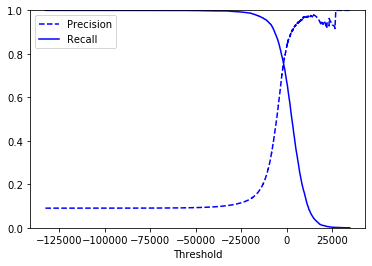

In [49]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
precision_recall_threshold_curve(precisions, recalls, thresholds)
plt.show()